In [16]:
# https://machinelearningmastery.com/sequence-classification-lstm-recurrent-neural-networks-python-keras/
import json
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from matplotlib import pyplot

In [4]:
# load dataset
filename = 'text_and_label_all/json_vectorized_test_2.json'

X = []
y = []
with open(filename) as json_file:
    data = json.load(json_file)
    
    for key, value in data.items():
        X.append(value["vectorized"])
        y.append(value["label"])

X = np.array(X)
y = np.array(y)

# X = X[:,np.newaxis]
# y = y[:,np.newaxis]
        
y = to_categorical(y, num_classes=5)
# y = np.expand_dims(y, axis=2)
        
print(X[0])
print(y[0])

[9, 5, 11, 6, 13, 15, 14, 12, 1, 17, 10, 16, 4, 505, 502, 504, 511, 503, 510, 507, 509, 508, 506, 500, 501]
[0. 0. 1. 0. 0.]


In [10]:
top_words = 558
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(11447,) (11447, 5)
(2862,) (2862, 5)


In [11]:
# truncate and pad input sequences
input_len = 62
X_train = sequence.pad_sequences(X_train, maxlen=input_len)
X_test = sequence.pad_sequences(X_test, maxlen=input_len)

In [12]:
# create the model
embedding_vecor_length = 8
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=input_len))
model.add(LSTM(16))
model.add(Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 62, 8)             4464      
_________________________________________________________________
lstm_2 (LSTM)                (None, 16)                1600      
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 85        
Total params: 6,149
Trainable params: 6,149
Non-trainable params: 0
_________________________________________________________________
None


In [14]:
history = model.fit(X_train, y_train, epochs=5, batch_size=16, validation_data=(X_test, y_test))
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 11447 samples, validate on 2862 samples
Epoch 1/5
11447/11447 [==============================] - 37s 3ms/step - loss: 1.3752 - acc: 0.3806 - val_loss: 1.4021 - val_acc: 0.3585
Epoch 2/5
11447/11447 [==============================] - 37s 3ms/step - loss: 1.3583 - acc: 0.3938 - val_loss: 1.4032 - val_acc: 0.3669
Epoch 3/5
11447/11447 [==============================] - 37s 3ms/step - loss: 1.3475 - acc: 0.3986 - val_loss: 1.4060 - val_acc: 0.3662
Epoch 4/5
11447/11447 [==============================] - 38s 3ms/step - loss: 1.3372 - acc: 0.4074 - val_loss: 1.4086 - val_acc: 0.3623
Epoch 5/5
11447/11447 [==============================] - 37s 3ms/step - loss: 1.3297 - acc: 0.4174 - val_loss: 1.4190 - val_acc: 0.3637
Accuracy: 36.37%


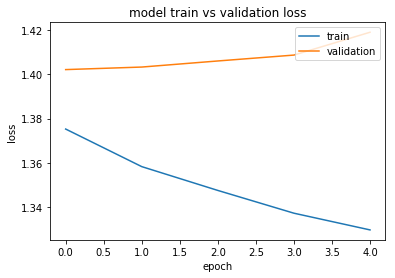

In [21]:
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

In [18]:
# create the model
embedding_vecor_length = 8
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=input_len))
model.add(Conv1D(filters=2, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(16))
model.add(Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 62, 8)             4464      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 62, 2)             50        
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 31, 2)             0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 16)                1216      
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 85        
Total params: 5,815
Trainable params: 5,815
Non-trainable params: 0
_________________________________________________________________
None


In [22]:
history2 = model.fit(X_train, y_train, epochs=5, batch_size=16, validation_data=(X_test, y_test))
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 11447 samples, validate on 2862 samples
Epoch 1/5
11447/11447 [==============================] - 20s 2ms/step - loss: 1.4385 - acc: 0.3394 - val_loss: 1.4265 - val_acc: 0.3438
Epoch 2/5
11447/11447 [==============================] - 20s 2ms/step - loss: 1.4084 - acc: 0.3625 - val_loss: 1.4223 - val_acc: 0.3498
Epoch 3/5
11447/11447 [==============================] - 20s 2ms/step - loss: 1.3898 - acc: 0.3741 - val_loss: 1.4340 - val_acc: 0.3431
Epoch 4/5
11447/11447 [==============================] - 19s 2ms/step - loss: 1.3771 - acc: 0.3824 - val_loss: 1.4228 - val_acc: 0.3508
Epoch 5/5
11447/11447 [==============================] - 20s 2ms/step - loss: 1.3634 - acc: 0.3919 - val_loss: 1.4242 - val_acc: 0.3539
Accuracy: 35.39%


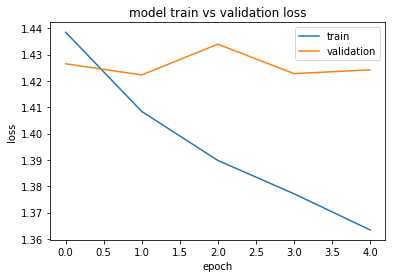

In [23]:
pyplot.plot(history2.history['loss'])
pyplot.plot(history2.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

In [13]:
# serialize model to JSON
model_json = model.to_json()
with open("models/conv_lstm_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("models/conv_lstm_model.h5")
print("Saved model to disk")

Saved model to disk
